In [1]:
path = 'https://raw.githubusercontent.com/LunusMax/football-data/refs/heads/main/Zagueiros_Brasileirao/df_zagueiros_092025.csv'

In [2]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from matplotlib import cm
from matplotlib.colors import ListedColormap

In [3]:
data = pd.read_csv(path, sep=';')

In [4]:
data.head()

,Jogador,Minutes,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,...,Sh,Pass,Int,Tkl+Int,Clr,Err,Aerial Won,Aerial Lost,Aerial Won%,Unnamed: 21
0,Leo Ortiz,1728,24,15,11,12,1,7,9,77.8,...,12,2,12,36,79,4,42,19,68.9,NaN
1,Lyanco,1078,24,14,16,4,4,10,16,62.5,...,10,6,27,51,62,3,26,18,59.1,NaN
2,F Bruno,1890,33,27,20,11,2,18,26,69.2,...,19,11,11,44,158,1,50,28,64.1,NaN
3,Leo Pereira,1752,16,11,12,3,1,10,22,45.5,...,9,10,16,32,77,1,36,26,58.1,NaN
4,Murilo,580,7,4,1,5,1,2,6,33.3,...,5,5,5,12,31,1,10,2,83.3,NaN


In [5]:
data = data.drop(columns='Unnamed: 21')

In [6]:
data.head()

,Jogador,Minutes,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,...,Blocks,Sh,Pass,Int,Tkl+Int,Clr,Err,Aerial Won,Aerial Lost,Aerial Won%
0,Leo Ortiz,1728,24,15,11,12,1,7,9,77.8,...,14,12,2,12,36,79,4,42,19,68.9
1,Lyanco,1078,24,14,16,4,4,10,16,62.5,...,16,10,6,27,51,62,3,26,18,59.1
2,F Bruno,1890,33,27,20,11,2,18,26,69.2,...,30,19,11,11,44,158,1,50,28,64.1
3,Leo Pereira,1752,16,11,12,3,1,10,22,45.5,...,19,9,10,16,32,77,1,36,26,58.1
4,Murilo,580,7,4,1,5,1,2,6,33.3,...,10,5,5,5,12,31,1,10,2,83.3


In [7]:
# Métricas por 90 minutos
data['TklW/90'] = (data['TklW'] * 90) / (data['Minutes'])
data['Int/90'] = (data['Int'] * 90) / (data['Minutes'])
data['Blocks/90'] = (data['Blocks'] * 90) / (data['Minutes'])
data['Clr/90'] = (data['Clr'] * 90) / (data['Minutes'])
data['Aerial Won/90'] = (data['Aerial Won'] * 90) / (data['Minutes'])
data['Err/90'] = (data['Err'] * 90) / (data['Minutes'])

In [8]:
data.head()

,Jogador,Minutes,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,...,Err,Aerial Won,Aerial Lost,Aerial Won%,TklW/90,Int/90,Blocks/90,Clr/90,Aerial Won/90,Err/90
0,Leo Ortiz,1728,24,15,11,12,1,7,9,77.8,...,4,42,19,68.9,0.781250,0.625000,0.729167,4.114583,2.187500,0.208333
1,Lyanco,1078,24,14,16,4,4,10,16,62.5,...,3,26,18,59.1,1.168831,2.254174,1.335807,5.176252,2.170686,0.250464
2,F Bruno,1890,33,27,20,11,2,18,26,69.2,...,1,50,28,64.1,1.285714,0.523810,1.428571,7.523810,2.380952,0.047619
3,Leo Pereira,1752,16,11,12,3,1,10,22,45.5,...,1,36,26,58.1,0.565068,0.821918,0.976027,3.955479,1.849315,0.051370
4,Murilo,580,7,4,1,5,1,2,6,33.3,...,1,10,2,83.3,0.620690,0.775862,1.551724,4.810345,1.551724,0.155172


In [9]:
data['Aerial Won%'] = data['Aerial Won%'] / 100

In [10]:
# Criando Métricas
peso_erro = 1

data['def_score'] = data['TklW/90'] + data['Int/90'] + data['Blocks/90'] + data['Clr/90']
data['aerial_score'] = data['Aerial Won/90'] * data['Aerial Won%']
data['confiab_score'] = (1.0 * peso_erro) / (1.0 + (data['Err/90']))

In [11]:
data.head()

,Jogador,Minutes,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,...,Aerial Won%,TklW/90,Int/90,Blocks/90,Clr/90,Aerial Won/90,Err/90,def_score,aerial_score,confiab_score
0,Leo Ortiz,1728,24,15,11,12,1,7,9,77.8,...,0.689,0.781250,0.625000,0.729167,4.114583,2.187500,0.208333,6.250000,1.507188,0.827586
1,Lyanco,1078,24,14,16,4,4,10,16,62.5,...,0.591,1.168831,2.254174,1.335807,5.176252,2.170686,0.250464,9.935065,1.282876,0.799703
2,F Bruno,1890,33,27,20,11,2,18,26,69.2,...,0.641,1.285714,0.523810,1.428571,7.523810,2.380952,0.047619,10.761905,1.526190,0.954545
3,Leo Pereira,1752,16,11,12,3,1,10,22,45.5,...,0.581,0.565068,0.821918,0.976027,3.955479,1.849315,0.051370,6.318493,1.074452,0.951140
4,Murilo,580,7,4,1,5,1,2,6,33.3,...,0.833,0.620690,0.775862,1.551724,4.810345,1.551724,0.155172,7.758621,1.292586,0.865672


In [12]:
data.columns

Index(['Jogador', 'Minutes', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl.1', 'Att', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int',
       'Tkl+Int', 'Clr', 'Err', 'Aerial Won', 'Aerial Lost', 'Aerial Won%',
       'TklW/90', 'Int/90', 'Blocks/90', 'Clr/90', 'Aerial Won/90', 'Err/90',
       'def_score', 'aerial_score', 'confiab_score'],
      dtype='object')

In [13]:
# Fazer ponderações com base em posse de bola
posse_times = {
    "Atletico Mineiro": 55.0,
    "Bahia": 54.5,
    "Botafogo": 52.3,
    "Ceara": 42.5,
    "Corinthians": 56.7,
    "Cruzeiro": 46.6,
    "Flamengo": 61.8,
    "Fluminense": 59.3,
    "Fortaleza": 46.7,
    "Gremio": 44.1,
    "Internacional": 52.3,
    "Juventude": 34.6,
    "Mirassol": 46.8,
    "Palmeiras": 51.3,
    "RB Bragantino": 47.4,
    "Santos": 47.9,
    "Sao Paulo": 58.8,
    "Sport Recife": 44.5,
    "Vasco da Gama": 53.7,
    "Vitoria": 42.9,
}

# Jogadores e seus respectivos times
jogador_posse = {
    "F Bruno": posse_times["Cruzeiro"],
    "A Barboza": posse_times["Botafogo"],
    "G Gomez": posse_times["Palmeiras"],
    "Ferraresi": posse_times["Sao Paulo"],
    "Jemmes": posse_times["Mirassol"],
    "Villalba": posse_times["Cruzeiro"],
    "Lyanco": posse_times["Atletico Mineiro"],
    "Leo Pereira": posse_times["Flamengo"],
    "Alan Franco": posse_times["Sao Paulo"],
    "Murilo": posse_times["Palmeiras"],
    "Leo Ortiz": posse_times["Flamengo"],
}

In [14]:
data["posse_time"] = data["Jogador"].map(jogador_posse)

In [15]:
data.head()

,Jogador,Minutes,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,...,TklW/90,Int/90,Blocks/90,Clr/90,Aerial Won/90,Err/90,def_score,aerial_score,confiab_score,posse_time
0,Leo Ortiz,1728,24,15,11,12,1,7,9,77.8,...,0.781250,0.625000,0.729167,4.114583,2.187500,0.208333,6.250000,1.507188,0.827586,61.8
1,Lyanco,1078,24,14,16,4,4,10,16,62.5,...,1.168831,2.254174,1.335807,5.176252,2.170686,0.250464,9.935065,1.282876,0.799703,55.0
2,F Bruno,1890,33,27,20,11,2,18,26,69.2,...,1.285714,0.523810,1.428571,7.523810,2.380952,0.047619,10.761905,1.526190,0.954545,46.6
3,Leo Pereira,1752,16,11,12,3,1,10,22,45.5,...,0.565068,0.821918,0.976027,3.955479,1.849315,0.051370,6.318493,1.074452,0.951140,61.8
4,Murilo,580,7,4,1,5,1,2,6,33.3,...,0.620690,0.775862,1.551724,4.810345,1.551724,0.155172,7.758621,1.292586,0.865672,51.3


In [16]:
data.columns

Index(['Jogador', 'Minutes', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl.1', 'Att', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int',
       'Tkl+Int', 'Clr', 'Err', 'Aerial Won', 'Aerial Lost', 'Aerial Won%',
       'TklW/90', 'Int/90', 'Blocks/90', 'Clr/90', 'Aerial Won/90', 'Err/90',
       'def_score', 'aerial_score', 'confiab_score', 'posse_time'],
      dtype='object')

In [18]:
# Fração de tempo defendendo (1 - posse). Evita dividir por zero com um eps.
eps = 1e-6
data["defense_share"] = (1 - data["posse_time"] / 100).clip(lower=eps)

# Ajustes pelos 3 quesitos
data["def_score_adj"] = data["def_score"] / data["defense_share"]
data["aerial_score_adj"] = data["aerial_score"] / data["defense_share"]

# Confiabilidade ajustada: recomputa a partir do Err/90 ajustado
#data['confiab_score_adj'] = data['confiab_score'] / data["defense_share"]
data["rank_confiab_adj"] = data["Err/90"].rank(ascending=True, method="min").astype(int)

In [20]:
data.head()

,Jogador,Minutes,Tkl,TklW,Def 3rd,Mid 3rd,Att 3rd,Tkl.1,Att,Tkl%,...,Aerial Won/90,Err/90,def_score,aerial_score,confiab_score,posse_time,defense_share,def_score_adj,aerial_score_adj,rank_confiab_adj
0,Leo Ortiz,1728,24,15,11,12,1,7,9,77.8,...,2.187500,0.208333,6.250000,1.507188,0.827586,61.8,0.382,16.361257,3.945517,10
1,Lyanco,1078,24,14,16,4,4,10,16,62.5,...,2.170686,0.250464,9.935065,1.282876,0.799703,55.0,0.450,22.077922,2.850835,11
2,F Bruno,1890,33,27,20,11,2,18,26,69.2,...,2.380952,0.047619,10.761905,1.526190,0.954545,46.6,0.534,20.153380,2.858035,2
3,Leo Pereira,1752,16,11,12,3,1,10,22,45.5,...,1.849315,0.051370,6.318493,1.074452,0.951140,61.8,0.382,16.540558,2.812702,4
4,Murilo,580,7,4,1,5,1,2,6,33.3,...,1.551724,0.155172,7.758621,1.292586,0.865672,51.3,0.487,15.931459,2.654181,9


In [21]:
data.columns

Index(['Jogador', 'Minutes', 'Tkl', 'TklW', 'Def 3rd', 'Mid 3rd', 'Att 3rd',
       'Tkl.1', 'Att', 'Tkl%', 'Lost', 'Blocks', 'Sh', 'Pass', 'Int',
       'Tkl+Int', 'Clr', 'Err', 'Aerial Won', 'Aerial Lost', 'Aerial Won%',
       'TklW/90', 'Int/90', 'Blocks/90', 'Clr/90', 'Aerial Won/90', 'Err/90',
       'def_score', 'aerial_score', 'confiab_score', 'posse_time',
       'defense_share', 'def_score_adj', 'aerial_score_adj',
       'rank_confiab_adj'],
      dtype='object')

In [22]:
#

if "rank_def_adj" not in data.columns:
    data["rank_def_adj"] = data["def_score_adj"].rank(ascending=False, method="min").astype(int)

if "rank_aereo_adj" not in data.columns:
    data["rank_aereo_adj"] = data["aerial_score_adj"].rank(ascending=False, method="min").astype(int)

# Se sua confiabilidade é "maior = melhor" (ex.: 1/(1+erro)), mantenha ascending=False:
if "rank_confiab_adj" not in data.columns:
    data["rank_confiab_adj"] = data["confiab_score_adj"].rank(ascending=False, method="min").astype(int)
    # Se preferir ranquear direto pelo erro ajustado (menor = melhor), use esta linha em vez da de cima:
    # data["rank_confiab_adj"] = data["Err/90_adj"].rank(ascending=True, method="min").astype(int)

if "rank_overall_adj_pos" not in data.columns:
    data["rank_overall_adj"] = data[["rank_def_adj","rank_aereo_adj","rank_confiab_adj"]].mean(axis=1)
    data["rank_overall_adj_pos"] = data["rank_overall_adj"].rank(ascending=True, method="min").astype(int)


/tmp/ipython-input-3581223202.py:25: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  base = cm.get_cmap("RdYlGn", 256)


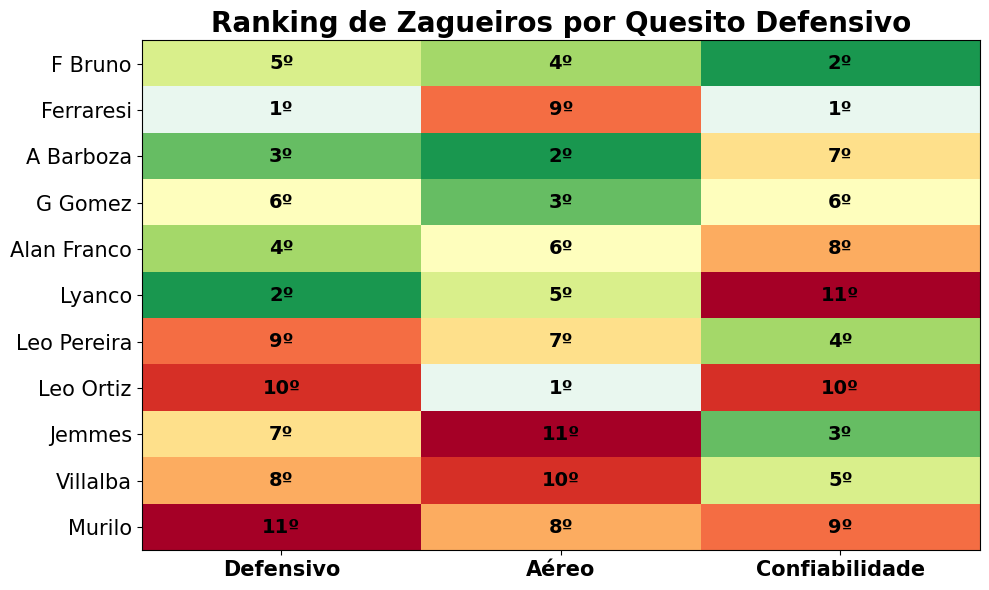

In [23]:
# ordem e matrizes (igual antes)
order = data.sort_values("rank_overall_adj_pos")["Jogador"].tolist()
idxd  = data.set_index("Jogador").reindex(order)

def percent_rank_from_rank(series):
    r = series.astype(float).values
    n = len(r)
    return np.ones_like(r) if n <= 1 else 1.0 - (r - 1.0) / (n - 1.0)  # 1º -> 1.0 ; último -> 0.0

vals = np.c_[
    percent_rank_from_rank(idxd["rank_def_adj"]),
    percent_rank_from_rank(idxd["rank_aereo_adj"]),
    percent_rank_from_rank(idxd["rank_confiab_adj"]),
]

labels = np.c_[
    idxd["rank_def_adj"].astype(int).astype(str) + "º",
    idxd["rank_aereo_adj"].astype(int).astype(str) + "º",
    idxd["rank_confiab_adj"].astype(int).astype(str) + "º",
]

cols = ["Defensivo", "Aéreo", "Confiabilidade"]

# colormap: RdYlGn, mas com o *último* tom (melhor) mais claro
base = cm.get_cmap("RdYlGn", 256)
colors = base(np.linspace(0, 1, 256))
colors[-1, :] = np.array([233/255, 247/255, 239/255, 1.0])
custom_cmap = ListedColormap(colors)

# fontes
FS_TITLE = 20
FS_TICKS = 15
FS_CELLS = 14

# plots
fig, ax = plt.subplots(figsize=(10, max(6, 0.45*len(order))))
im = ax.imshow(vals, aspect="auto", cmap=custom_cmap, vmin=0, vmax=1)

# ticks X/Y maiores
ax.set_xticks(range(len(cols)))
ax.set_xticklabels(cols, fontsize=FS_TICKS, fontweight="bold")
ax.set_yticks(range(len(order)))
ax.set_yticklabels(order, fontsize=FS_TICKS)

# rótulos nas células maiores
for i in range(vals.shape[0]):
    for j in range(vals.shape[1]):
        ax.text(j, i, labels[i, j], ha="center", va="center",
                fontsize=FS_CELLS, fontweight="bold")

# título maior
ax.set_title("Ranking de Zagueiros por Quesito Defensivo",
             fontsize=FS_TITLE, fontweight="bold")

plt.tight_layout()
plt.savefig("heatmap_zagueiros_2025_ajustado_rank_pct_lighttop_bigfonts.png", dpi=150)
plt.show()

In [26]:
chk = (1 - data["posse_time"]/100).clip(lower=1e-6)
print("ok?", np.allclose(data["defense_share"], chk, atol=1e-9))

ok? True


In [28]:
# Confirma a fórmula
chk = (1 - data["posse_time"]/100).clip(lower=1e-6)
print("defense_share ok? ", np.allclose(data["defense_share"], chk, atol=1e-9))

# Sinal do ajuste (exemplo com def_score)
print(
    data[["Jogador","posse_time","def_score","def_score_adj"]]
    .sort_values("posse_time", ascending=False)
    .head(5)
)

defense_share ok?  True
       Jogador  posse_time  def_score  def_score_adj
0    Leo Ortiz        61.8   6.250000      16.361257
3  Leo Pereira        61.8   6.318493      16.540558
8  Alan Franco        58.8   8.394794      20.375713
9    Ferraresi        58.8   9.493942      23.043547
1       Lyanco        55.0   9.935065      22.077922
